
# Data and computations for paper 

Lars G. Johnsen
National Library of Norway

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
mu.update('collocations')
from collocations import dist_coll_urn, urn_coll, calculate_midpoint, dist
import pandas as pd

Updated file `C:\Users\yoons\Documents\GitHub\newspapers_coll_conc\collocations.py`

In [2]:
def df_jaccard(df, col1, col2, number=100, asc=False):
    s1 = df.sort_values(by=col1, ascending=asc)[:number].index
    s2 = df.sort_values(by=col2, ascending=asc)[:number].index
    
    #print(len(set(s1)&set(s2)))
    
    return jaccard(s1, s2)

In [3]:
dist_coll_urn??

In [4]:
def jaccards(s1, s2):
    return len(set(s1)&set(s2)),len(set(s1)|set(s2))

In [5]:
def jaccard(s1, s2):
    return len(set(s1)&set(s2))/len(set(s1)|set(s2))

In [6]:
def large_corpus_dist_coll(collword, urns = None, after= 10, before = 0, n = 300):
    colls_freq = []
    colls_dist = []
    coll = pd.DataFrame()
    for i in range(0, len(urns), n):
        a = urn_coll(collword, urns = urns[i:i + n], after= after, before = before)
        colls_freq.append(nb.frame(a['freq']))
        colls_dist.append(nb.frame(a['dist']))
    coll['freq'] = pd.concat(colls_freq, axis=1, sort=False).sum(axis=1)
    coll['dist'] = pd.concat(colls_dist, axis = 1, sort=False).mean(axis=1)
    coll['dist_score'] = round(dist(coll['dist'], calculate_midpoint(before, after), coll['freq']), 2)
    return coll

In [7]:
def large_corpus_coll(collword, urns = None, after= 5, before = 5, n = 300):
    colls = []
    for i in range(0, len(urns), n):
        colls.append(nb.urn_coll(collword, urns=urns[i:i + n], after= after, before = before))
    coll = pd.concat(colls, axis=1, sort=False).sum(axis=1)
    return pd.DataFrame(coll)

In [8]:
def make_coll_df(small, large, tot):
    """take two collocations, small and large, and a reference tot. The reference must av a column call tot as well"""
    coll = pd.DataFrame()
    coll['small'] = small['freq']
    coll['large'] = large['freq']
    #coll['ratio'] = coll['small']/coll['large']
    coll['srel'] = coll.small/coll.small.sum()
    coll['lrel'] = coll.large/coll.large.sum()
    coll['ratio'] = coll.srel/coll.lrel
    coll['adjusted'] = coll.small**0.01*coll.ratio
    coll['nb'] = coll.small/tot.tot
    return coll

### Reference corpus

The reference is the total counts from approximately 450 000 books from nb.no

In [15]:
tot = nb.frame(nb.totals(50000), 'tot')

In [16]:
nb.normalize_corpus_dataframe(tot)
tot.head()

,tot
.,0.058921
",",0.051453
og,0.025297
i,0.021425
det,0.012728


# Corpus

The corpus for doing collocations is a sample of 800 books from fictional literature, dewey decimal code 813.

In [17]:
smd = 5
lmd = 10
collword = 'kaffe'

In [18]:
def filenames(smd = smd, lmd = lmd, collword = collword, corpus_size= 1000, period = (1980, 2000)):
    return {
    'small_right': '_'.join([collword, str(smd), str(corpus_size), '-'.join([str(x) for x in period]), str(0), str(int(2*smd)), '.csv']),
    'large_right': '_'.join([collword, str(smd), str(corpus_size),  '-'.join([str(x) for x in period]), str(0), str(int(2*lmd)), '.csv']),
    'small_left' : '_'.join([collword, str(lmd), str(corpus_size),  '-'.join([str(x) for x in period]), str(int(2*smd)), str(0), '.csv']),
    'large_left' : '_'.join([collword, str(lmd), str(corpus_size),  '-'.join([str(x) for x in period]), str(int(2*lmd)), str(0), '.csv'])
        }

In [19]:
names = filenames(smd=smd, lmd=lmd, collword=collword)
names

{'small_right': 'kaffe_5_1000_1980-2000_0_10_.csv',
 'large_right': 'kaffe_5_1000_1980-2000_0_20_.csv',
 'small_left': 'kaffe_10_1000_1980-2000_10_0_.csv',
 'large_left': 'kaffe_10_1000_1980-2000_20_0_.csv'}

In [20]:
a1 = pd.read_csv(names['small_right'], index_col=0)
a2 = pd.read_csv(names['large_right'], index_col=0)
b1 = pd.read_csv(names['small_left'], index_col=0)
b2 = pd.read_csv(names['large_left'], index_col=0)

Set up the distance parameters and collword, smd is small distance while lmd is large distance. These values are half of the actual window, and used to make a normalized score, call ascore. See below.

## Create collocation dataframe 

Based on data from a1 and a2, and b1 and b2. The name for the collocations after is `coll` while `collb` is for the collocates coming before.

In [21]:
coll = make_coll_df(a1, a2, tot)
collb = make_coll_df(b1, b2, tot)

## Sorting 

Sorting on the reference is by column 'nb'

In [22]:
coll[coll.small > 1].sort_values(by='nb', ascending=False)[:20][:20].fillna(0).style.background_gradient()

,small,large,srel,lrel,ratio,adjusted,nb
kakao,63.000000,70.000000,0.001163,0.000701,1.659611,1.729815,23907732.503365
drikkes,22.000000,23.000000,0.000406,0.000230,1.763837,1.819210,16324018.910988
bananer,33.000000,38.000000,0.000609,0.000380,1.601379,1.658361,16215916.534861
koppene,19.000000,25.000000,0.000351,0.000250,1.401449,1.443327,14215863.983630
kaker,92.000000,96.000000,0.001698,0.000961,1.767178,1.848920,13860500.704922
rundstykker,14.000000,17.000000,0.000258,0.000170,1.518598,1.559208,13451262.921728
vafler,13.000000,15.000000,0.000240,0.000150,1.598144,1.639665,11722355.266675
konjakk,37.000000,40.000000,0.000683,0.000400,1.705711,1.768428,11081206.167580
kannen,11.000000,11.000000,0.000203,0.000110,1.844012,1.888764,10737416.992139
Kaffen,10.000000,22.000000,0.000185,0.000220,0.838187,0.857711,9807636.801351


In [23]:
coll[coll.small < coll.large].sort_values(by='adjusted', ascending=False)[:20].fillna(0).style.background_gradient()

,small,large,srel,lrel,ratio,adjusted,nb
kaker,92.000000,96.000000,0.001698,0.000961,1.767178,1.848920,13860500.704922
drikkes,22.000000,23.000000,0.000406,0.000230,1.763837,1.819210,16324018.910988
kake,19.000000,20.000000,0.000351,0.000200,1.751811,1.804159,2123124.988083
tømmer,15.000000,16.000000,0.000277,0.000160,1.728761,1.776216,1104948.231568
bomull,50.000000,54.000000,0.000923,0.000540,1.707418,1.775537,9396807.995416
smørbrød,26.000000,28.000000,0.000480,0.000280,1.712297,1.769004,7996268.168537
konjakk,37.000000,40.000000,0.000683,0.000400,1.705711,1.768428,11081206.167580
krydder,14.000000,15.000000,0.000258,0.000150,1.721078,1.767103,2760658.133488
mineralvann,13.000000,14.000000,0.000240,0.000140,1.712297,1.756784,9234843.568717
senga,13.000000,14.000000,0.000240,0.000140,1.712297,1.756784,823880.379391


In [24]:
coll[coll.small < coll.large].sort_values(by='ratio', ascending=False)[:20].fillna(0).style.background_gradient()

,small,large,srel,lrel,ratio,adjusted,nb
kaker,92.000000,96.000000,0.001698,0.000961,1.767178,1.848920,13860500.704922
drikkes,22.000000,23.000000,0.000406,0.000230,1.763837,1.819210,16324018.910988
kake,19.000000,20.000000,0.000351,0.000200,1.751811,1.804159,2123124.988083
tømmer,15.000000,16.000000,0.000277,0.000160,1.728761,1.776216,1104948.231568
krydder,14.000000,15.000000,0.000258,0.000150,1.721078,1.767103,2760658.133488
mineralvann,13.000000,14.000000,0.000240,0.000140,1.712297,1.756784,9234843.568717
smørbrød,26.000000,28.000000,0.000480,0.000280,1.712297,1.769004,7996268.168537
senga,13.000000,14.000000,0.000240,0.000140,1.712297,1.756784,823880.379391
bomull,50.000000,54.000000,0.000923,0.000540,1.707418,1.775537,9396807.995416
konjakk,37.000000,40.000000,0.000683,0.000400,1.705711,1.768428,11081206.167580


In [25]:
coll.loc[[',','.', 'og','eller', 'i', 'på']]

,small,large,srel,lrel,ratio,adjusted,nb
",",3215.0,5612.0,0.059328,0.056161,1.056397,1.145246,62483.801541
.,3964.0,7216.0,0.073150,0.072213,1.012980,1.100480,67276.426308
og,2753.0,4318.0,0.050803,0.043212,1.175675,1.272581,108825.065221
eller,215.0,341.0,0.003968,0.003412,1.162647,1.226795,78311.061755
i,980.0,1964.0,0.018085,0.019654,0.920128,0.985736,45740.823258
på,847.0,1607.0,0.015630,0.016082,0.971922,1.039705,88329.235686


# collb

In [26]:
collb[collb.small < collb.large].sort_values(by='adjusted', ascending=False)[:40].fillna(0).style.background_gradient()

,small,large,srel,lrel,ratio,adjusted,nb
skjenket,163.000000,166.000000,0.003008,0.001667,1.804562,1.898863,19046102.687159
drakk,326.000000,336.000000,0.006016,0.003374,1.783079,1.889308,11721836.060278
kopp,850.000000,886.000000,0.015686,0.008897,1.763102,1.886130,60660700.687023
kanne,58.000000,61.000000,0.001070,0.000613,1.747392,1.819804,31512385.031817
rykende,37.000000,39.000000,0.000683,0.000392,1.743530,1.807638,13967273.657997
helte,35.000000,37.000000,0.000646,0.000372,1.738435,1.801355,6412547.258887
slurk,49.000000,52.000000,0.000904,0.000522,1.731749,1.800474,6429201.191129
serverer,19.000000,20.000000,0.000351,0.000201,1.745886,1.798057,7512593.105597
sterk,85.000000,91.000000,0.001569,0.000914,1.716603,1.794585,857144.989490
svart,107.000000,115.000000,0.001975,0.001155,1.709929,1.791728,1735090.328723


In [27]:
collb.sort_values(by='nb', ascending=False)[:40].fillna(0).style.background_gradient()

,small,large,srel,lrel,ratio,adjusted,nb
kopp,850.000000,886.000000,0.015686,0.008897,1.763102,1.886130,60660700.687023
kanne,58.000000,61.000000,0.001070,0.000613,1.747392,1.819804,31512385.031817
skjenket,163.000000,166.000000,0.003008,0.001667,1.804562,1.898863,19046102.687159
mineralvann,25.000000,27.000000,0.000461,0.000271,1.701643,1.757308,17759314.555225
rykende,37.000000,39.000000,0.000683,0.000392,1.743530,1.807638,13967273.657997
Viktigste,25.000000,58.000000,0.000461,0.000582,0.792144,0.818057,13824889.876693
kakao,35.000000,44.000000,0.000646,0.000442,1.461866,1.514775,13282073.612981
serverte,43.000000,47.000000,0.000794,0.000472,1.681368,1.745812,13044195.725393
kopper,87.000000,106.000000,0.001605,0.001064,1.508362,1.577251,11961834.235255
vafler,13.000000,15.000000,0.000240,0.000151,1.592738,1.634119,11722355.266675


In [28]:
collb.sort_values(by='nb', ascending=False).loc[['sterk', 'kruttsterk']].fillna(0).style.background_gradient()

,small,large,srel,lrel,ratio,adjusted,nb
sterk,85.000000,91.000000,0.001569,0.000914,1.716603,1.794585,857144.989490
kruttsterk,7.000000,8.000000,0.000129,0.000080,1.608053,1.639650,0.000000


# coll

In [39]:
coll[coll.small < coll.large].sort_values(by='ratio', ascending=False)[:30].fillna(0).style.background_gradient()

,small,large,srel,lrel,ratio,adjusted,nb
kaker,92.000000,96.000000,0.001698,0.000961,1.767178,1.848920,13860500.704922
drikkes,22.000000,23.000000,0.000406,0.000230,1.763837,1.819210,16324018.910988
kake,19.000000,20.000000,0.000351,0.000200,1.751811,1.804159,2123124.988083
tømmer,15.000000,16.000000,0.000277,0.000160,1.728761,1.776216,1104948.231568
krydder,14.000000,15.000000,0.000258,0.000150,1.721078,1.767103,2760658.133488
mineralvann,13.000000,14.000000,0.000240,0.000140,1.712297,1.756784,9234843.568717
smørbrød,26.000000,28.000000,0.000480,0.000280,1.712297,1.769004,7996268.168537
senga,13.000000,14.000000,0.000240,0.000140,1.712297,1.756784,823880.379391
bomull,50.000000,54.000000,0.000923,0.000540,1.707418,1.775537,9396807.995416
konjakk,37.000000,40.000000,0.000683,0.000400,1.705711,1.768428,11081206.167580


In [30]:
coll.sort_values(by='nb', ascending=False)[:30].fillna(0).style.background_gradient()

,small,large,srel,lrel,ratio,adjusted,nb
kakao,63.000000,70.000000,0.001163,0.000701,1.659611,1.729815,23907732.503365
drikkes,22.000000,23.000000,0.000406,0.000230,1.763837,1.819210,16324018.910988
bananer,33.000000,38.000000,0.000609,0.000380,1.601379,1.658361,16215916.534861
koppene,19.000000,25.000000,0.000351,0.000250,1.401449,1.443327,14215863.983630
kaker,92.000000,96.000000,0.001698,0.000961,1.767178,1.848920,13860500.704922
rundstykker,14.000000,17.000000,0.000258,0.000170,1.518598,1.559208,13451262.921728
vafler,13.000000,15.000000,0.000240,0.000150,1.598144,1.639665,11722355.266675
konjakk,37.000000,40.000000,0.000683,0.000400,1.705711,1.768428,11081206.167580
kannen,11.000000,11.000000,0.000203,0.000110,1.844012,1.888764,10737416.992139
Kaffen,10.000000,22.000000,0.000185,0.000220,0.838187,0.857711,9807636.801351


# jaccard similarity

compare over a range

In [31]:
rng = range(2,40,2)

# for collb

In [32]:
jaccard_scoresb = nb.frame({'ratio': {x:df_jaccard(collb[collb.small < collb.large], 'nb', 'adjusted', x) for x in rng},
                            'srel': {x:df_jaccard(collb[collb.small < collb.large], 'nb', 'srel', x) for x in rng},
                           'lrel': {x:df_jaccard(collb[collb.small < collb.large], 'nb', 'lrel', x) for x in rng}
                          }).transpose()

Text(0, 0.5, 'Jaccard score')

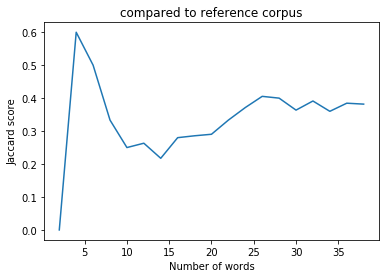

In [33]:
ax = jaccard_scoresb['ratio'].plot(title='compared to reference corpus');
ax.set_xlabel("Number of words")
ax.set_ylabel("Jaccard score")

# for coll

In [34]:
jaccard_scores = nb.frame({'ratio': {x:df_jaccard(coll[coll.small < coll.large], 'nb', 'adjusted', x) for x in rng},
                            'srel': {x:df_jaccard(coll[coll.small < coll.large], 'nb', 'srel', x) for x in rng},
                           'lrel': {x:df_jaccard(coll[coll.small < coll.large], 'nb', 'lrel', x) for x in rng}
                          }).transpose()

Text(0, 0.5, 'Jaccard score')

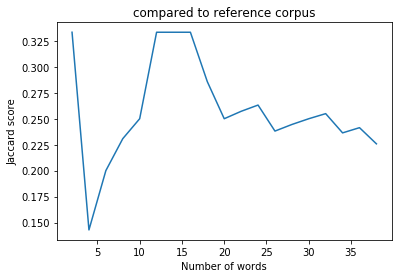

In [35]:
ax = jaccard_scores['ratio'].plot(title='compared to reference corpus');
ax.set_xlabel("Number of words")
ax.set_ylabel("Jaccard score")

In [ ]:
jaccards(collb[collb.small < collb.large].sort_values(by='ratio', ascending = False)[:60].index, collb.sort_values(by='nb', ascending=False)[:100].index)